In [1]:
from IPython import display
display.Image("day11part1instructionsA.jpeg")

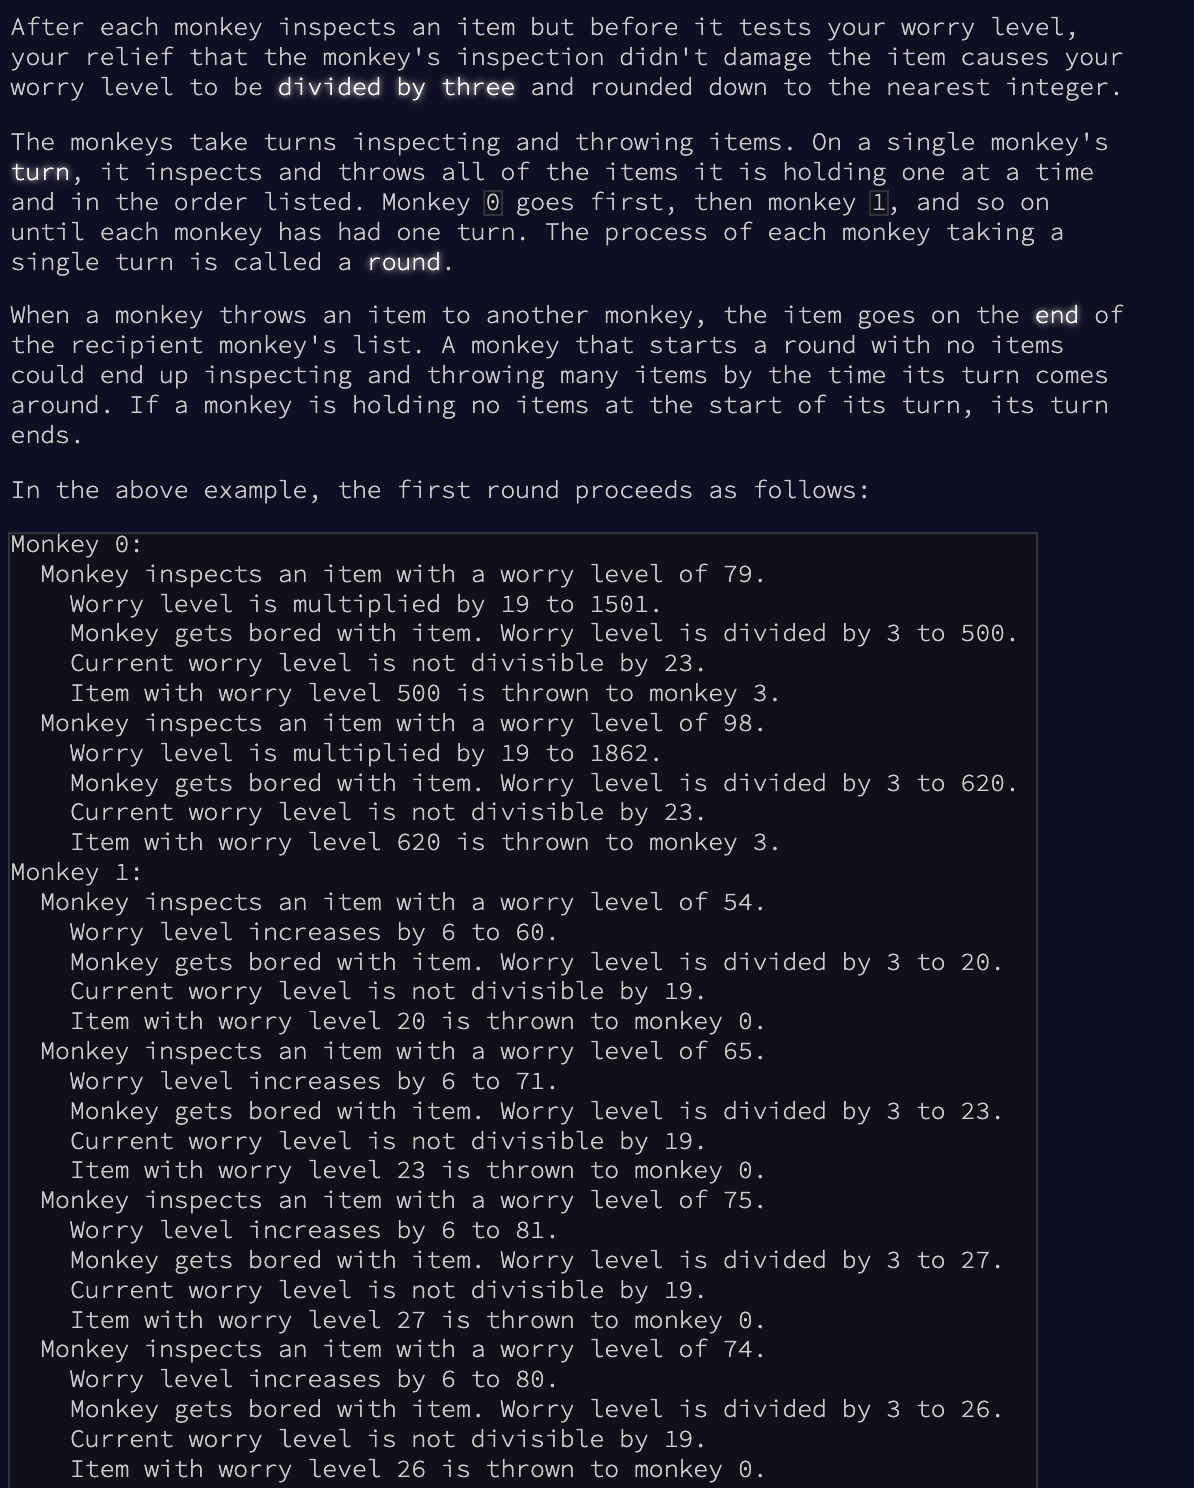

In [2]:
display.Image("day11part1instructionsB.jpeg")

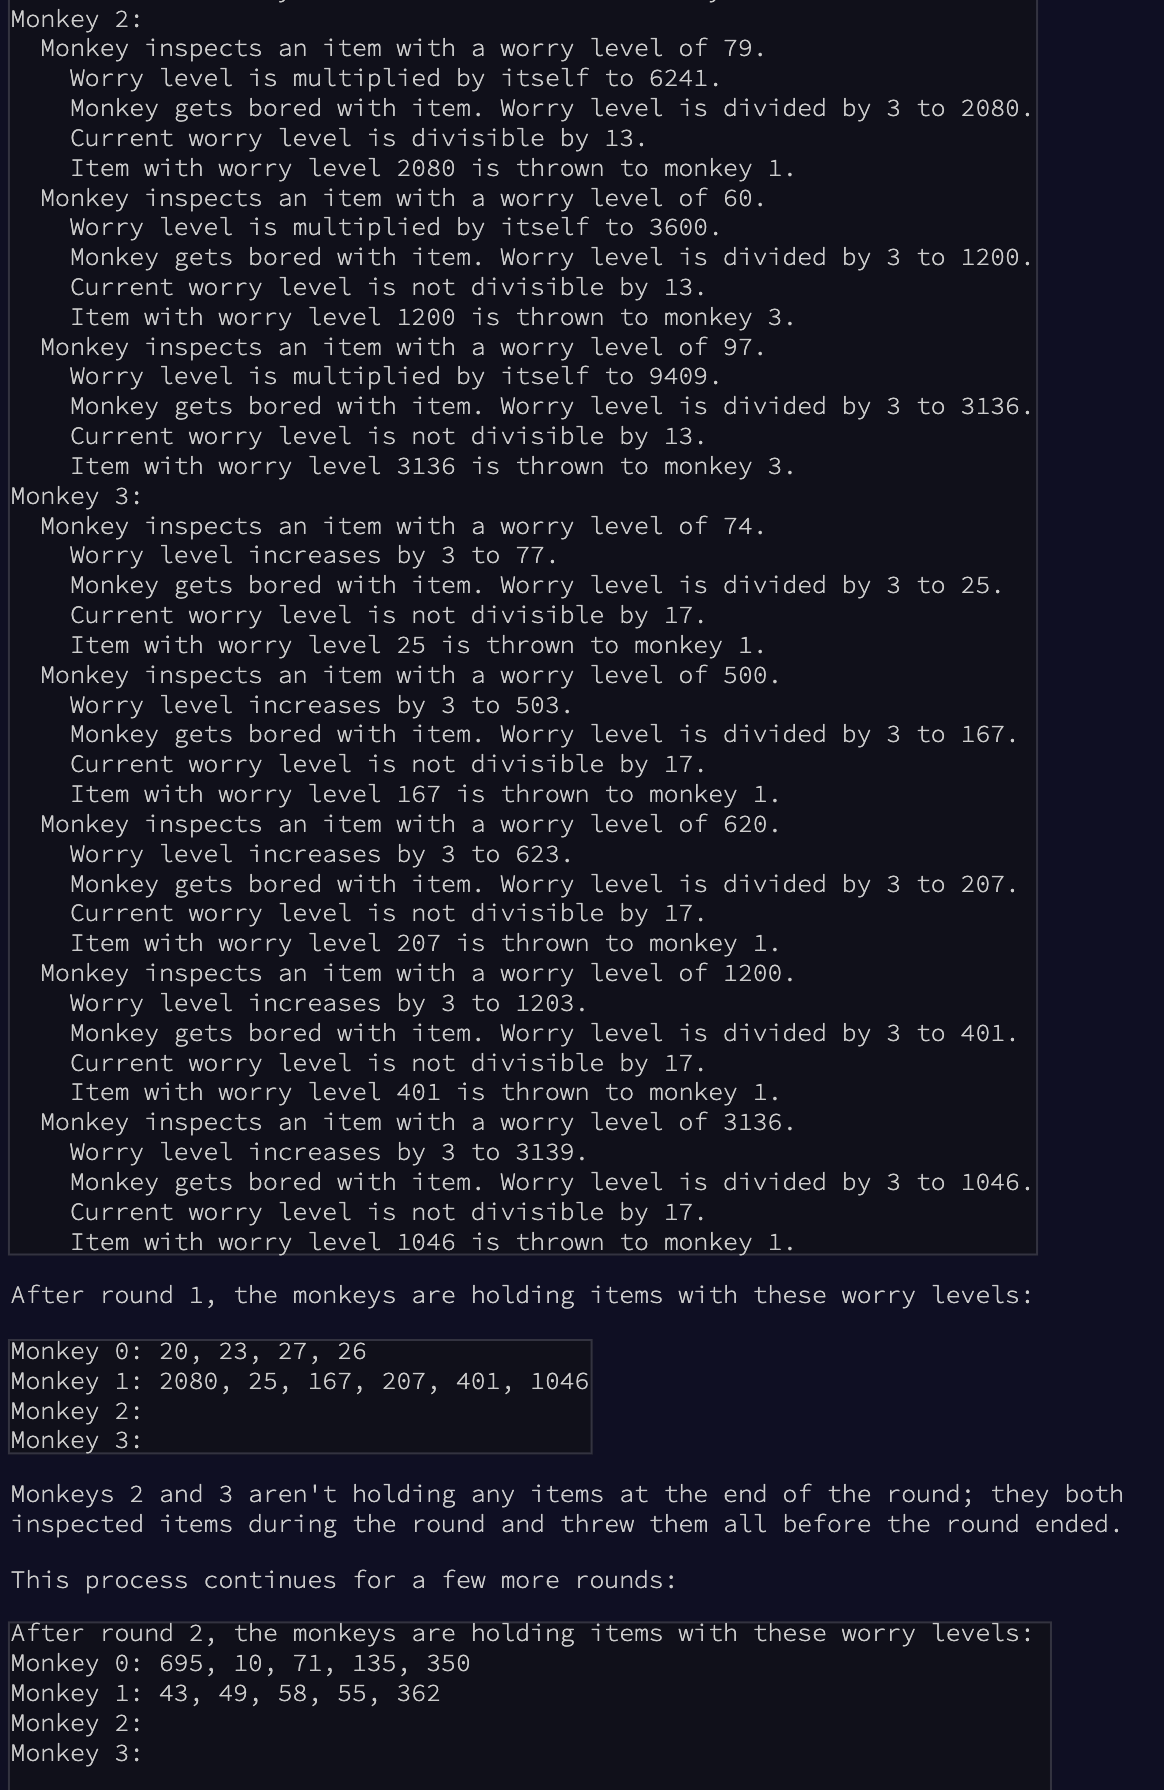

In [3]:
display.Image("day11part1instructionsC.jpeg")

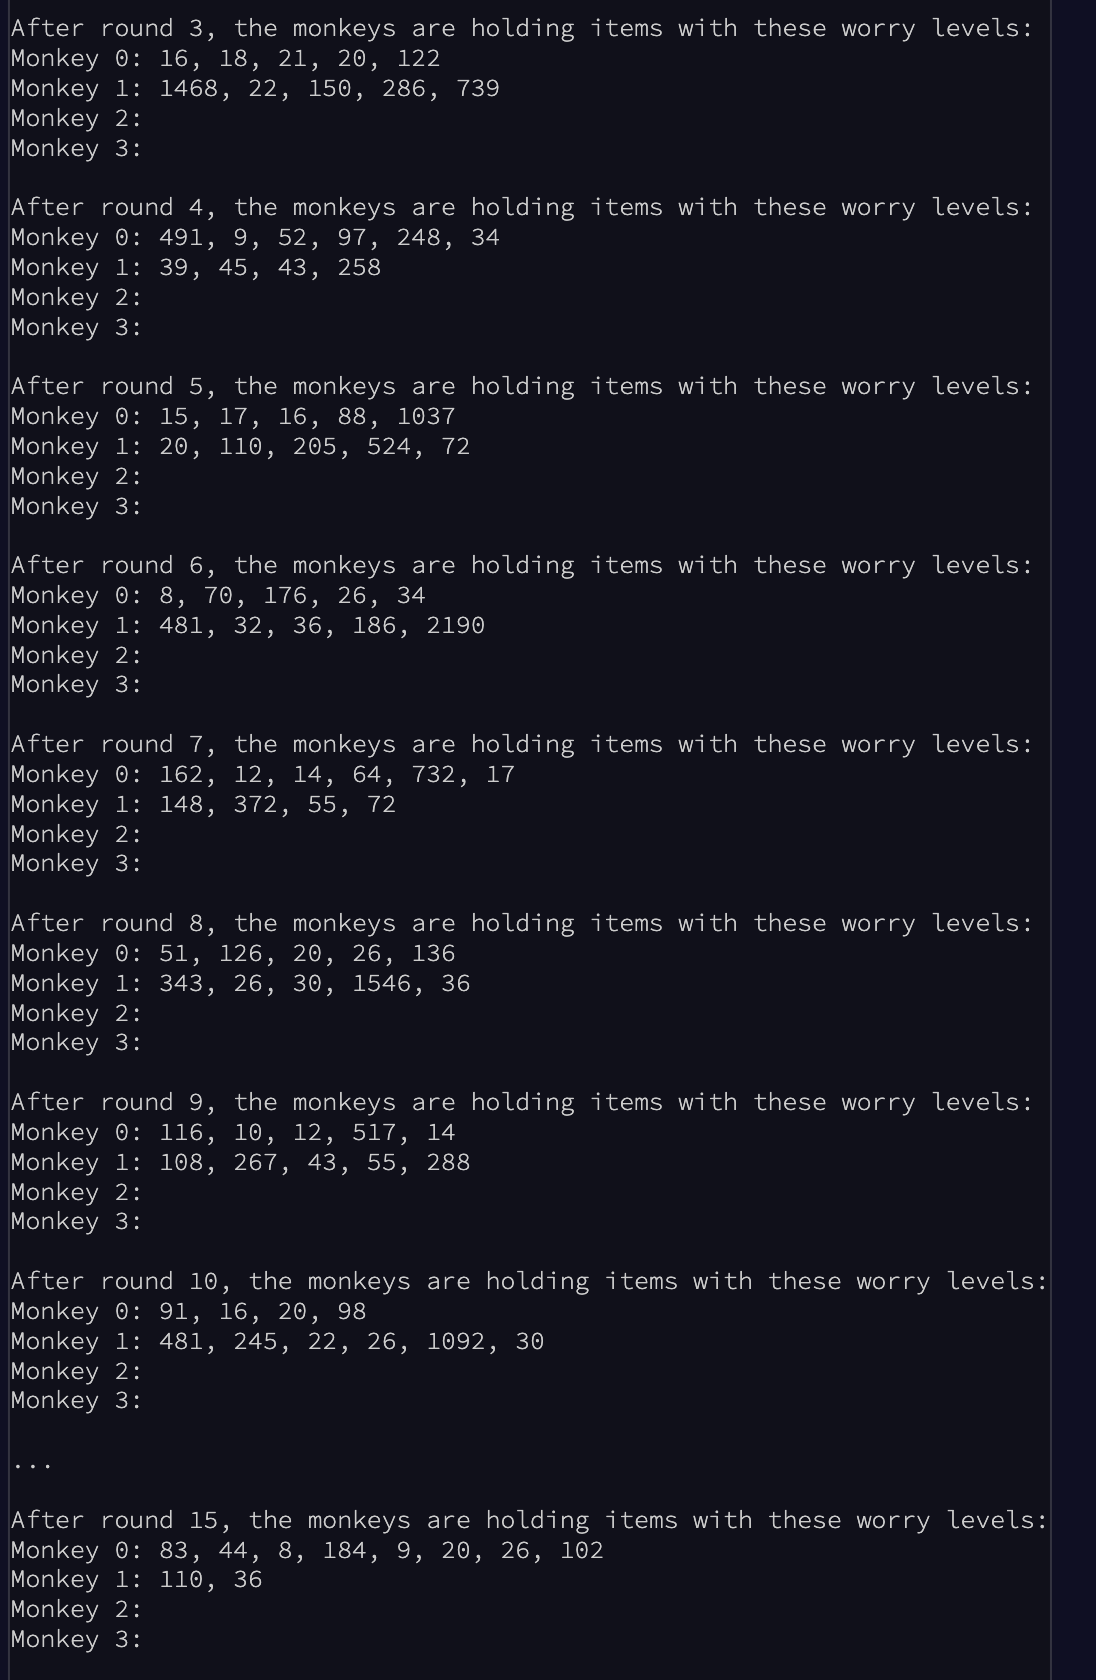

In [4]:
display.Image("day11part1instructionsD.jpeg")

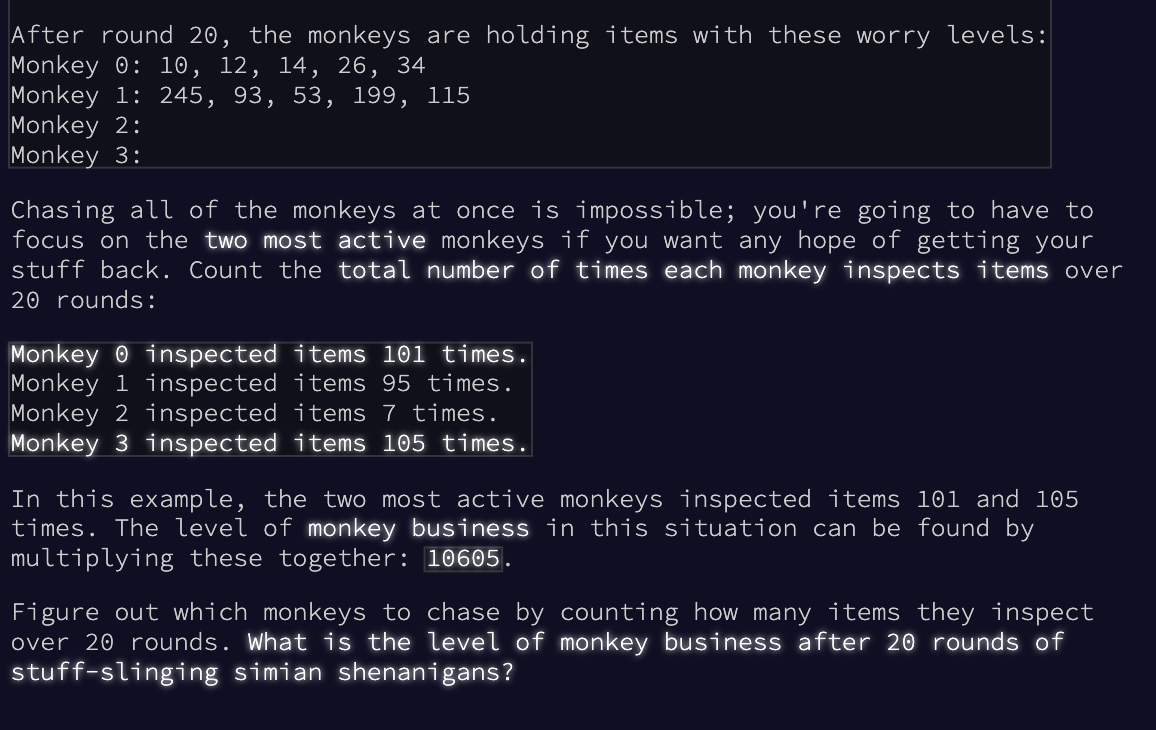

In [5]:
display.Image("day11part1instructionsE.jpeg")

<b>TESTING ON SAMPLE INPUT<b/>

<!-- Monkey 0:
  Starting items: 79, 98
  Operation: new = old * 19
  Test: divisible by 23
    If true: throw to monkey 2
    If false: throw to monkey 3

Monkey 1:
  Starting items: 54, 65, 75, 74
  Operation: new = old + 6
  Test: divisible by 19
    If true: throw to monkey 2
    If false: throw to monkey 0

Monkey 2:
  Starting items: 79, 60, 97
  Operation: new = old * old
  Test: divisible by 13
    If true: throw to monkey 1
    If false: throw to monkey 3

Monkey 3:
  Starting items: 74
  Operation: new = old + 3
  Test: divisible by 17
    If true: throw to monkey 0
    If false: throw to monkey 1 -->

In [6]:
# list of dicts of attributes for each monkey

monkey0 = {'items':[79,98],'operation':['*', 19],'divtest':23,'truethrow':2,'falsethrow':3,'inspections':0}
monkey1 = {'items':[54,65,75,74],'operation':['+', 6],'divtest':19,'truethrow':2,'falsethrow':0,'inspections':0}
monkey2 = {'items':[79,60,97],'operation':'squared','divtest':13,'truethrow':1,'falsethrow':3,'inspections':0}
monkey3 = {'items':[74],'operation':['+',3],'divtest':17,'truethrow':0,'falsethrow':1,'inspections':0}

monkeylist = [monkey0,monkey1,monkey2,monkey3]

monkeylist

[{'items': [79, 98],
  'operation': ['*', 19],
  'divtest': 23,
  'truethrow': 2,
  'falsethrow': 3,
  'inspections': 0},
 {'items': [54, 65, 75, 74],
  'operation': ['+', 6],
  'divtest': 19,
  'truethrow': 2,
  'falsethrow': 0,
  'inspections': 0},
 {'items': [79, 60, 97],
  'operation': 'squared',
  'divtest': 13,
  'truethrow': 1,
  'falsethrow': 3,
  'inspections': 0},
 {'items': [74],
  'operation': ['+', 3],
  'divtest': 17,
  'truethrow': 0,
  'falsethrow': 1,
  'inspections': 0}]

In [7]:
# iterate through 20 rounds:
#   iterate through the monkey list for each round:
#     iterate through the items each monkey is holding:
#       keep track of how many items each monkey inspects
#       perform the monkey's inspection operation on each item,
#       keeping track of new value of each inspected item
#       divide each inspected item by 3
#       remove each divided item from the monkey's item list
#       check if each divided item is divisible by the monkey's division test:
#         if so, append it to the item list of the 'true throw' listed monkey
#         if not, append it to the item list of the 'false throw' listed monkey
# ^repeat above, keeping track of how many items each monkey inspects by the end of each round

for round in range(20):
    print(f'***round {round+1}***')
    
    for monkey in monkeylist:
        inspected_items = []
        for item in monkey['items']:
            monkey['inspections'] += 1
            if monkey['operation'] == 'squared':
                inspected_items.append(item * item)
            elif monkey['operation'][0] == '+':
                inspected_items.append(item + monkey['operation'][1])
            elif monkey['operation'][0] == '*':
                inspected_items.append(item * monkey['operation'][1])
        inspected_items = [item//3 for item in inspected_items]
        monkey['items'] = inspected_items
        for i in range(len(monkey['items'])):
            item_to_throw = monkey['items'].pop(0)
            if item_to_throw % monkey['divtest'] == 0:
                throw_to = monkey['truethrow']
                monkeylist[throw_to]['items'].append(item_to_throw)
            else:
                throw_to = monkey['falsethrow']
                monkeylist[throw_to]['items'].append(item_to_throw)
    
    for n,monkey in enumerate(monkeylist):
        print(f'monkey {n} inspections: {monkey["inspections"]}')
    print()


***round 1***
monkey 0 inspections: 2
monkey 1 inspections: 4
monkey 2 inspections: 3
monkey 3 inspections: 5

***round 2***
monkey 0 inspections: 6
monkey 1 inspections: 10
monkey 2 inspections: 4
monkey 3 inspections: 10

***round 3***
monkey 0 inspections: 11
monkey 1 inspections: 15
monkey 2 inspections: 4
monkey 3 inspections: 15

***round 4***
monkey 0 inspections: 16
monkey 1 inspections: 20
monkey 2 inspections: 4
monkey 3 inspections: 20

***round 5***
monkey 0 inspections: 22
monkey 1 inspections: 24
monkey 2 inspections: 4
monkey 3 inspections: 26

***round 6***
monkey 0 inspections: 27
monkey 1 inspections: 29
monkey 2 inspections: 5
monkey 3 inspections: 31

***round 7***
monkey 0 inspections: 32
monkey 1 inspections: 34
monkey 2 inspections: 5
monkey 3 inspections: 36

***round 8***
monkey 0 inspections: 38
monkey 1 inspections: 38
monkey 2 inspections: 5
monkey 3 inspections: 42

***round 9***
monkey 0 inspections: 43
monkey 1 inspections: 43
monkey 2 inspections: 5
monk

In [8]:
# number of inspections by each monkey after final round

n_inspections = [monkey['inspections'] for monkey in monkeylist]

n_inspections

[101, 95, 7, 105]

In [9]:
# top two inspection amounts

n_inspections.sort()
top_two = n_inspections[-2:]

top_two

[101, 105]

In [10]:
# calcuating monkey business

monkey_business = top_two[0] * top_two[1]

monkey_business

10605

<b>SOLVING ON ACTUAL PUZZLE INPUT</b>

In [11]:
# same strategy as above just with more monkeys, different monkey attributes, and more items

with open('day11input.txt') as day11input:
    raw_input = day11input.read()
    
raw_input

'Monkey 0:\n  Starting items: 53, 89, 62, 57, 74, 51, 83, 97\n  Operation: new = old * 3\n  Test: divisible by 13\n    If true: throw to monkey 1\n    If false: throw to monkey 5\n\nMonkey 1:\n  Starting items: 85, 94, 97, 92, 56\n  Operation: new = old + 2\n  Test: divisible by 19\n    If true: throw to monkey 5\n    If false: throw to monkey 2\n\nMonkey 2:\n  Starting items: 86, 82, 82\n  Operation: new = old + 1\n  Test: divisible by 11\n    If true: throw to monkey 3\n    If false: throw to monkey 4\n\nMonkey 3:\n  Starting items: 94, 68\n  Operation: new = old + 5\n  Test: divisible by 17\n    If true: throw to monkey 7\n    If false: throw to monkey 6\n\nMonkey 4:\n  Starting items: 83, 62, 74, 58, 96, 68, 85\n  Operation: new = old + 4\n  Test: divisible by 3\n    If true: throw to monkey 3\n    If false: throw to monkey 6\n\nMonkey 5:\n  Starting items: 50, 68, 95, 82\n  Operation: new = old + 8\n  Test: divisible by 7\n    If true: throw to monkey 2\n    If false: throw to mon

In [12]:
input_list = raw_input.splitlines()

input_list

['Monkey 0:',
 '  Starting items: 53, 89, 62, 57, 74, 51, 83, 97',
 '  Operation: new = old * 3',
 '  Test: divisible by 13',
 '    If true: throw to monkey 1',
 '    If false: throw to monkey 5',
 '',
 'Monkey 1:',
 '  Starting items: 85, 94, 97, 92, 56',
 '  Operation: new = old + 2',
 '  Test: divisible by 19',
 '    If true: throw to monkey 5',
 '    If false: throw to monkey 2',
 '',
 'Monkey 2:',
 '  Starting items: 86, 82, 82',
 '  Operation: new = old + 1',
 '  Test: divisible by 11',
 '    If true: throw to monkey 3',
 '    If false: throw to monkey 4',
 '',
 'Monkey 3:',
 '  Starting items: 94, 68',
 '  Operation: new = old + 5',
 '  Test: divisible by 17',
 '    If true: throw to monkey 7',
 '    If false: throw to monkey 6',
 '',
 'Monkey 4:',
 '  Starting items: 83, 62, 74, 58, 96, 68, 85',
 '  Operation: new = old + 4',
 '  Test: divisible by 3',
 '    If true: throw to monkey 3',
 '    If false: throw to monkey 6',
 '',
 'Monkey 5:',
 '  Starting items: 50, 68, 95, 82',


In [13]:
monkey0 = {'items':[53,89,62,57,74,51,83,97],'operation':['*', 3],'divtest':13,'truethrow':1,'falsethrow':5,'inspections':0}
monkey1 = {'items':[85,94,97,92,56],'operation':['+', 2],'divtest':19,'truethrow':5,'falsethrow':2,'inspections':0}
monkey2 = {'items':[86,82,82],'operation':['+', 1],'divtest':11,'truethrow':3,'falsethrow':4,'inspections':0}
monkey3 = {'items':[94,68],'operation':['+', 5],'divtest':17,'truethrow':7,'falsethrow':6,'inspections':0}
monkey4 = {'items':[83,62,74,58,96,68,85],'operation':['+', 4],'divtest':3,'truethrow':3,'falsethrow':6,'inspections':0}
monkey5 = {'items':[50,68,95,82],'operation':['+', 8],'divtest':7,'truethrow':2,'falsethrow':4,'inspections':0}
monkey6 = {'items':[75],'operation':['*', 7],'divtest':5,'truethrow':7,'falsethrow':0,'inspections':0}
monkey7 = {'items':[92,52,85,89,68,82],'operation':'squared','divtest':2,'truethrow':0,'falsethrow':1,'inspections':0}

monkeylist = [monkey0,monkey1,monkey2,monkey3,monkey4,monkey5,monkey6,monkey7]


In [14]:
for round in range(20):
    
    for monkey in monkeylist:
        inspected_items = []
        for item in monkey['items']:
            monkey['inspections'] += 1
            if monkey['operation'] == 'squared':
                inspected_items.append(item * item)
            elif monkey['operation'][0] == '+':
                inspected_items.append(item + monkey['operation'][1])
            elif monkey['operation'][0] == '*':
                inspected_items.append(item * monkey['operation'][1])
        inspected_items = [item//3 for item in inspected_items]
        monkey['items'] = inspected_items
        for i in range(len(monkey['items'])):
            item_to_throw = monkey['items'].pop(0)
            if item_to_throw % monkey['divtest'] == 0:
                throw_to = monkey['truethrow']
                monkeylist[throw_to]['items'].append(item_to_throw)
            else:
                throw_to = monkey['falsethrow']
                monkeylist[throw_to]['items'].append(item_to_throw)
                
print(f'***after 20 rounds***')  
print()
for n,monkey in enumerate(monkeylist):
    print(f'monkey {n} inspections: {monkey["inspections"]}')
    print()
                    

***after 20 rounds***

monkey 0 inspections: 324

monkey 1 inspections: 17

monkey 2 inspections: 27

monkey 3 inspections: 59

monkey 4 inspections: 330

monkey 5 inspections: 324

monkey 6 inspections: 334

monkey 7 inspections: 15



In [15]:
n_inspections = [monkey['inspections'] for monkey in monkeylist]

n_inspections

[324, 17, 27, 59, 330, 324, 334, 15]

In [16]:
n_inspections.sort()
top_two = n_inspections[-2:]

top_two

[330, 334]

In [17]:
monkey_business = top_two[0] * top_two[1]

monkey_business

110220